# Data Preparation & Exploration for Climate (ulmo)

I want to merge the data from GSOD to my ILI data by getting a summary of the data by position
-  exploring daymet : daily temperature, precipitation for any locationsion in the US [reference](https://github.com/ulmo-dev/ulmo/blob/master/examples/Using%20Daymet%20weather%20data%20from%20ORNL%20webservice.ipynb)

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
#%aimport preprocess.build_features
#from preprocess.build_features import remove_invalid_data

### Exploratory data analysis

In [2]:
# import libraries

import os
import fnmatch
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path ="../data/raw/2010-2015_ili_activity_sub_climate.csv"

df = pd.read_csv(file_path) # read in csv file as a DataFrame

### Data Summary

In [4]:
df.head() # return the first 5 rows

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
0,1,AK,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,-152.404419,40,0.0,0,0,0,0,0,0,0
1,2,AK,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,-152.404419,38,0.0,0,0,0,0,0,0,0
2,3,AK,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,-152.404419,21,0.0,0,0,0,0,0,0,0
3,4,AK,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,-152.404419,37,0.0,0,0,0,0,0,0,0
4,5,AK,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,-152.404419,32,0.0,0,0,0,0,0,0,0


In [5]:
df.describe() # summary statistics, excluding NaN values

,Unnamed: 0,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,mavg_4weeks_TEMP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
count,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,...,11838.000000,11838.000000,11838.000000,11838.000000,11838.0,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000
mean,5919.500000,2012.825646,6.363490,25.863068,10.945249,17.445285,5.329628,1.729411,967.536217,10.960578,...,-95.643067,187.143943,13.353292,4.241341,0.0,10.940277,8.297179,0.000084,6.479304,0.033874
std,3417.480578,1.492119,3.607588,15.697586,10.392543,10.874626,10.110708,2.242116,51.503266,10.056909,...,19.872848,292.782739,17.642693,16.996890,0.0,35.790661,38.170934,0.009191,18.114227,1.162530
min,1.000000,2010.000000,1.000000,1.000000,-23.266667,-15.011475,-30.740741,0.000000,802.673529,-17.638798,...,-157.498337,10.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2960.250000,2012.000000,3.000000,12.000000,3.429274,9.348037,-1.675581,0.265658,963.899176,3.457609,...,-106.248482,36.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5919.500000,2013.000000,6.000000,25.000000,11.293815,18.368451,5.306753,0.977039,986.863397,11.179563,...,-92.288368,93.000000,5.880000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,8878.750000,2014.000000,10.000000,41.000000,19.823242,26.529957,13.441024,2.350500,998.864864,19.761622,...,-80.954453,218.000000,20.257500,1.000000,0.0,6.000000,2.000000,0.000000,5.000000,0.000000
max,11838.000000,2015.000000,12.000000,53.000000,34.631977,42.916860,26.187083,48.803846,1027.366667,33.041652,...,-69.381927,3646.000000,100.000000,431.000000,0.0,890.000000,806.000000,1.000000,370.000000,76.000000


In [6]:
df.info(verbose=True, null_counts=True) # concise summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11838 entries, 0 to 11837
Data columns (total 31 columns):
Unnamed: 0                   11838 non-null int64
STATE                        11838 non-null object
YEAR                         11838 non-null int64
MONTH                        11838 non-null int64
WEEK                         11838 non-null int64
week_TEMP                    11838 non-null float64
week_MAX                     11838 non-null float64
week_MIN                     11838 non-null float64
week_PRCP                    11838 non-null float64
week_STP                     11838 non-null float64
mavg_4weeks_TEMP             11838 non-null float64
mavg_4weeks_MAX              11838 non-null float64
mavg_4weeks_MIN              11838 non-null float64
mavg_4weeks_PRCP             11838 non-null float64
diff_week_TEMP               11838 non-null float64
percent_diff                 11838 non-null float64
statename                    11838 non-null object
ili_activity_labe

In [7]:
df.shape # shape of dataset

(11838, 31)

In [8]:
df.skew() # skewness for numeric columns

Unnamed: 0                     0.000000
YEAR                          -0.102257
MONTH                          0.086173
WEEK                           0.097118
week_TEMP                     -0.288817
week_MAX                      -0.349468
week_MIN                      -0.246492
week_PRCP                      3.522762
week_STP                      -1.715318
mavg_4weeks_TEMP              -0.224758
mavg_4weeks_MAX               -0.302494
mavg_4weeks_MIN               -0.174636
mavg_4weeks_PRCP               1.655413
diff_week_TEMP                -0.030495
percent_diff                 -13.905459
Latitude                       0.413240
Longitude                     -1.321319
total_specimens                4.661261
percent_positive               1.874025
a_2009_h1n1                    8.920150
a_h1                           0.000000
a_h3                           8.432333
a_subtyping_not_performed     10.189131
a_unable_to_subtype          108.802573
b                              7.192358


In [9]:
df.kurt() # unbiased kurtosis for numeric columns

Unnamed: 0                      -1.200000
YEAR                            -1.091458
MONTH                           -1.328962
WEEK                            -1.331485
week_TEMP                       -0.664354
week_MAX                        -0.700960
week_MIN                        -0.531854
week_PRCP                       29.940277
week_STP                         1.897147
mavg_4weeks_TEMP                -0.814339
mavg_4weeks_MAX                 -0.795788
mavg_4weeks_MIN                 -0.710429
mavg_4weeks_PRCP                 5.003827
diff_week_TEMP                   1.359379
percent_diff                  2262.678825
Latitude                         3.449344
Longitude                        1.761772
total_specimens                 31.776888
percent_positive                 3.745236
a_2009_h1n1                    122.356375
a_h1                             0.000000
a_h3                           111.819426
a_subtyping_not_performed      139.082309
a_unable_to_subtype          11838

In [10]:
df.get_dtype_counts() # counts of dtypes

float64    14
int64      12
object      5
dtype: int64

## display missing value proportion for each col

In [11]:
for c in df.columns:
  num_na = df[c].isnull().sum()
  if num_na > 0:
    print(round(num_na / float(len(df)), 3), '|', c)

In [15]:
df.corr()

,Unnamed: 0,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,mavg_4weeks_TEMP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
Unnamed: 0,1.000000,0.030603,-0.002872,-0.002757,-0.066058,-0.047533,-0.080523,-0.000131,-0.149584,-0.068735,...,0.172835,0.074008,-0.050721,0.001502,NaN,-0.004702,0.021967,0.007441,0.016079,-0.000754
YEAR,0.030603,1.000000,-0.212730,-0.213305,0.072361,0.089077,0.046460,0.030053,0.009517,0.080968,...,0.009918,0.183785,-0.038299,-0.002328,NaN,0.059010,0.095707,-0.011246,0.069890,-0.014566
MONTH,-0.002872,-0.212730,1.000000,0.995462,0.206714,0.190303,0.220802,0.013581,0.015289,0.178727,...,-0.007092,-0.116768,-0.284472,-0.177286,NaN,-0.077160,-0.018795,0.004170,-0.218591,0.011084
WEEK,-0.002757,-0.213305,0.995462,1.000000,0.203590,0.187046,0.217932,0.012789,0.014991,0.175307,...,-0.006994,-0.114395,-0.282134,-0.175998,NaN,-0.073827,-0.015127,0.004179,-0.218716,0.010948
week_TEMP,-0.066058,0.072361,0.206714,0.203590,1.000000,0.987267,0.986612,0.142465,0.104946,0.973571,...,-0.038578,-0.170538,-0.485106,-0.221374,NaN,-0.224046,-0.145459,0.009504,-0.146414,0.034512
week_MAX,-0.047533,0.089077,0.190303,0.187046,0.987267,1.000000,0.950989,0.091873,0.019315,0.961182,...,-0.040948,-0.170513,-0.488400,-0.216788,NaN,-0.237636,-0.146883,0.008256,-0.142147,0.032331
week_MIN,-0.080523,0.046460,0.220802,0.217932,0.986612,0.950989,1.000000,0.201239,0.191141,0.961325,...,-0.032482,-0.163158,-0.471627,-0.221662,NaN,-0.205340,-0.138003,0.010796,-0.143474,0.034302
week_PRCP,-0.000131,0.030053,0.013581,0.012789,0.142465,0.091873,0.201239,1.000000,0.183542,0.144003,...,0.154086,-0.038206,-0.103562,-0.052544,NaN,-0.054995,-0.030157,0.013496,-0.039059,-0.000989
week_STP,-0.149584,0.009517,0.015289,0.014991,0.104946,0.019315,0.191141,0.183542,1.000000,0.111871,...,0.309915,0.044720,-0.061484,-0.030773,NaN,0.010422,0.043192,0.002510,0.021467,0.010264
mavg_4weeks_TEMP,-0.068735,0.080968,0.178727,0.175307,0.973571,0.961182,0.961325,0.144003,0.111871,1.000000,...,-0.039412,-0.175464,-0.494135,-0.226605,NaN,-0.234350,-0.154975,0.009689,-0.141077,0.034199


In [18]:
cm = np.corrcoef(df.T)
sns.heatmap(cm, annot=True, yticklabels=df.columns, xticklabels=df.columns)

/Users/bbuildman/anaconda3/envs/python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/bbuildman/anaconda3/envs/python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [20]:
# single column
sns.distplot(df['count'].dropna())

# all numeric columns
for c in df.columns:
  if df[c].dtype in ['int64', 'float64']:
    sns.distplot(df[c].dropna(), kde=False)
    plt.show()

KeyError: 'count'

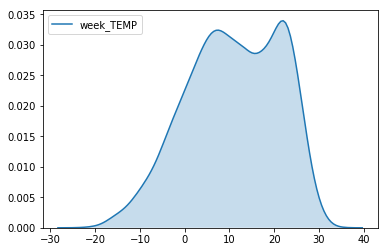

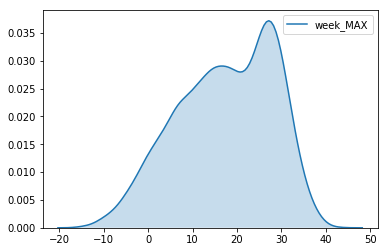

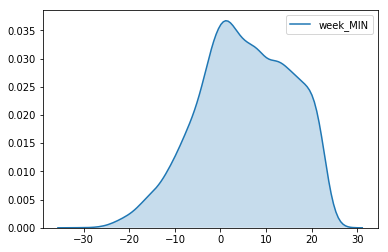

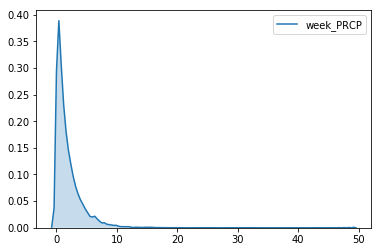

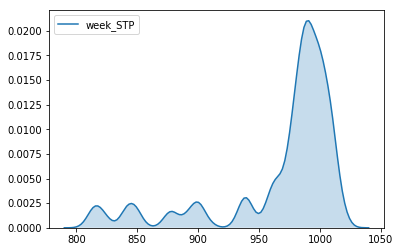

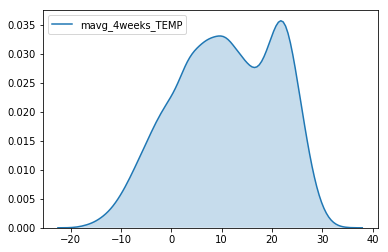

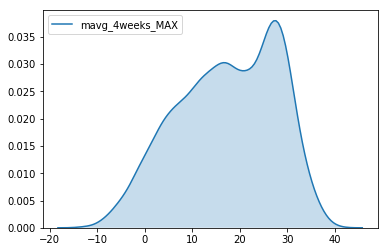

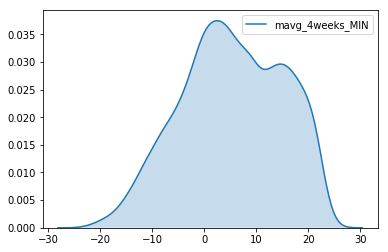

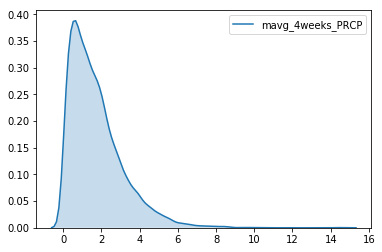

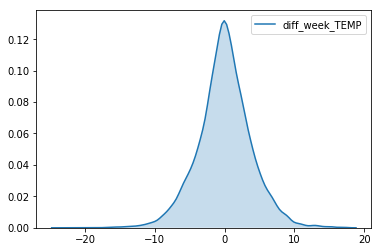

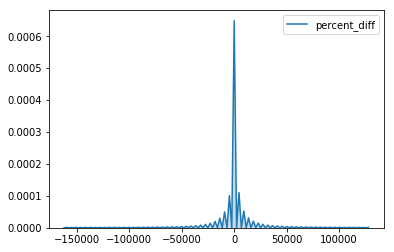

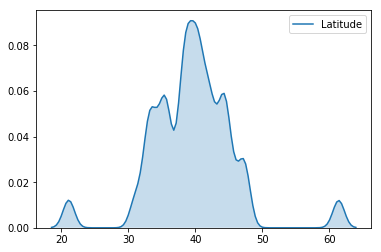

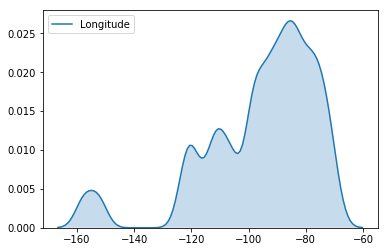

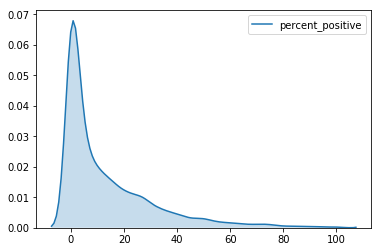

In [33]:
# all continuous variables
The first for c in df.columns:
  if df[c].dtype in ['float64']:
    sns.kdeplot(df[c].dropna(), shade=True)
    plt.show()

In [25]:
sns.pairplot(df.dropna())

In [23]:
#encode categorical features
from sklearn.preprocessing import LabelEncoder

df_col = df.columns
col_non_num = [c for c in df_col if df[c].dtype == 'object']
for c in col_non_num:
  df[c] = LabelEncoder().fit_transform(df[c])

[Pandas dataframe groupeby datetime month](https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month)


In [24]:
df.head()

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
0,1,0,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,-152.404419,40,0.0,0,0,0,0,0,0,0
1,2,0,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,-152.404419,38,0.0,0,0,0,0,0,0,0
2,3,0,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,-152.404419,21,0.0,0,0,0,0,0,0,0
3,4,0,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,-152.404419,37,0.0,0,0,0,0,0,0,0
4,5,0,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,-152.404419,32,0.0,0,0,0,0,0,0,0


# Transformation

In [28]:
one_hot_df = pd.get_dummies(df[['ili_activity_label', 'ili_activity_group']])
one_hot_df.head()

one_hot_df = pd.get_dummies(df)
one_hot_df.head()

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
0,1,0,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,-152.404419,40,0.0,0,0,0,0,0,0,0
1,2,0,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,-152.404419,38,0.0,0,0,0,0,0,0,0
2,3,0,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,-152.404419,21,0.0,0,0,0,0,0,0,0
3,4,0,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,-152.404419,37,0.0,0,0,0,0,0,0,0
4,5,0,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,-152.404419,32,0.0,0,0,0,0,0,0,0
